Scale is a generic term that tells how wide the distribution is. There is a separate mathematical formula for each type of distribution, but scipy just uses "scale" to keep it simple.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_csv('data.csv', header=None)

### Put the data in a single array

In [4]:
data = raw_data.values.reshape(-1)
data.shape

(138,)

In [5]:
data[:10], data[-10:]  # show the beginning and the end of data

(array(['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM',
        '8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM'], dtype=object),
 array(['9:00 AM', '8:57 AM', '8:57 AM', '8:50 AM', '8:45 AM', '8:50 AM',
        '8:30 AM', '8:45 AM', '8:50 AM', '8:10 AM'], dtype=object))

In [6]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError:
        return None
    

In [7]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in data]

In [8]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [9]:
x_label = 'Minutes (negative is early, zero is on time, positive is late)'
y_label = 'Count'
hist_title = 'Student On-Time Performance'

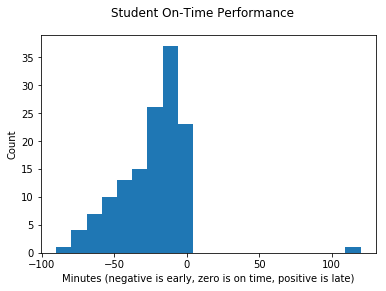

In [10]:
fig, ax = plt.subplots()
ax.hist(y, bins=20)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

In [11]:
import scipy
from scipy import stats

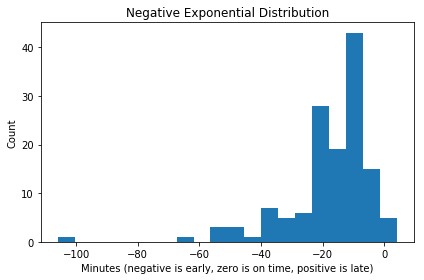

In [40]:
# Create subplots
fig, ax = plt.subplots()

# Create some fake data with a negative exponential distribution
exponential_dist = stats.expon(loc= 5, scale=15)
fake_y = -(exponential_dist.rvs(137))  

normal_dist2 = stats.norm(loc=0, scale=5)
fake_y += normal_dist2.rvs(137)
# Plot the data from the exponential distribution
ax = ax
ax.hist(fake_y, bins=20)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Negative Exponential Distribution")

# Show the plots

plt.tight_layout()
plt.show()

In [36]:
#this didn't work :)

# from scipy.stats import weibull_max 

# # Create subplots
# fig, ax = plt.subplots()

# # Create some fake data with an exponential distribution
# weibull_max_dist = stats.weibull_max(120, loc= 0, scale=17.5)
# fake_y = - (weibull_max.rvs(120))  

# # Plot the data from the exponential distribution
# ax = ax
# ax.hist(fake_y, bins=20)
# ax.set_xlabel(x_label)
# ax.set_ylabel(y_label)
# ax.set_title("Weibull Distribution")

# # Show the plots

# plt.tight_layout()
# plt.show()